<a href="https://colab.research.google.com/github/wallisonferreira/data-science-tce/blob/main/aula6_ex1_SVM_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exemplo1: Classificação usando o dataset Pima Indians Diabetes

Este conjunto de dados é originalmente do Instituto Nacional de Diabetes e Doenças Digestivas e Renais. O objetivo do conjunto de dados é prever se um paciente tem ou não diabetes, com base em certas medidas de diagnóstico incluídas no conjunto de dados. Várias restrições foram colocadas na seleção dessas instâncias de um banco de dados maior. Em particular, todos os pacientes aqui são mulheres com pelo menos 21 anos de ascendência indígena Pima.

## Classificação KFold

### Carregando os dados

In [1]:
# SVM Classification
from pandas import read_csv
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

#Carregando o dataset
filename = 'https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv(filename, header=None, names=names)

#removendo a primeira linha que contém os cabeçalho no arquivo
df = df.drop(labels=0, axis=0)

array = df.values
print(df)


    preg plas pres skin test  mass   pedi age class
1      6  148   72   35    0  33.6  0.627  50     1
2      1   85   66   29    0  26.6  0.351  31     0
3      8  183   64    0    0  23.3  0.672  32     1
4      1   89   66   23   94  28.1  0.167  21     0
5      0  137   40   35  168  43.1  2.288  33     1
..   ...  ...  ...  ...  ...   ...    ...  ..   ...
764   10  101   76   48  180  32.9  0.171  63     0
765    2  122   70   27    0  36.8   0.34  27     0
766    5  121   72   23  112  26.2  0.245  30     0
767    1  126   60    0    0  30.1  0.349  47     1
768    1   93   70   31    0  30.4  0.315  23     0

[768 rows x 9 columns]


### Realizando experimento com KFold

Obs: Os dados não estão normalizados

In [2]:
X = array[:,0:8]
Y = array[:,8]
kfold = StratifiedKFold(n_splits=10, random_state=None, shuffle=False)

# usando parâmetro default do SVM
model = SVC()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean(), results.std())

0.7578605604921396 0.030485323326655524


Refazendo o experimento KFold com dados normalizados

In [3]:
from sklearn.preprocessing import MinMaxScaler

X = array[:,0:8]
Y = array[:,8]

scaler = MinMaxScaler(feature_range=(-1, 1))
rescaledX = scaler.fit_transform(X)

kfold = StratifiedKFold(n_splits=10, random_state=None, shuffle=False)

# usando parâmetro default do SVM
model = SVC()
results = cross_val_score(model, rescaledX, Y, cv=kfold)
print(results.mean(), results.std())




0.7708304853041696 0.031556492661674075


#Experimento comparando treino com parâmetros: default x otimizados


### Carregando os dados, normalizando e dividindo treino/teste

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X = array[:,0:8]
Y = array[:,8]

#Normalizando os dados
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)

# Fazendo o Split Treino/Teste
X_train, X_test, y_train, y_test = train_test_split(rescaledX, Y, test_size = 0.20, random_state = 101)




### Treinando com Split Train/Test sem otimização de parâmetros

In [5]:
from sklearn.metrics import classification_report, confusion_matrix
# train the model on train set
model = SVC() # SVM para classificação
model.fit(X_train, y_train)

# print prediction results
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       103
           1       0.74      0.63      0.68        51

    accuracy                           0.81       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.80      0.81      0.80       154



### Plotando matriz de confusão para teste como modelo sem otimização

Confusion matrix, without normalization
[[92 11]
 [19 32]]
Normalized confusion matrix
[[0.89320388 0.10679612]
 [0.37254902 0.62745098]]


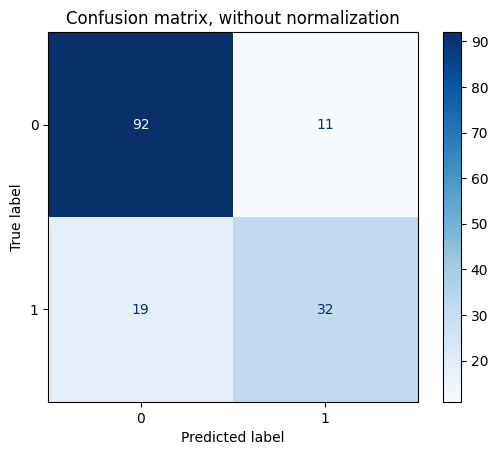

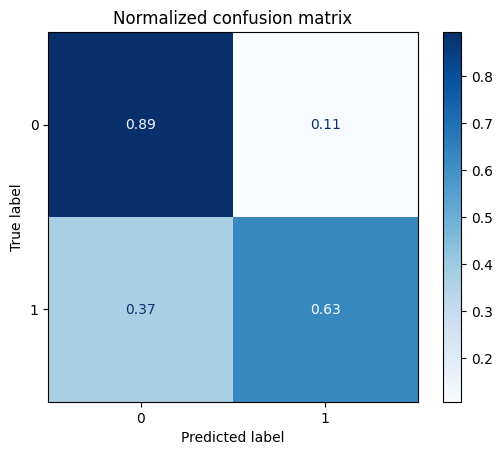

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        y_test,
        display_labels=[0,1],
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

### Treinando com Split Train/Test com otimização de parâmetros

In [10]:
from sklearn.model_selection import GridSearchCV
# Definindo o intervalo de parâmetros
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.642 total time=   0.0s
[CV 2/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.642 total time=   0.0s
[CV 3/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.650 total time=   0.0s
[CV 4/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.650 total time=   0.0s
[CV 5/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.648 total time=   0.0s
[CV 1/5] END ......C=0.01, gamma=1, kernel=poly;, score=0.732 total time=   0.0s
[CV 2/5] END ......C=0.01, gamma=1, kernel=poly;, score=0.699 total time=   0.0s
[CV 3/5] END ......C=0.01, gamma=1, kernel=poly;, score=0.699 total time=   0.0s
[CV 4/5] END ......C=0.01, gamma=1, kernel=poly;, score=0.715 total time=   0.0s
[CV 5/5] END ......C=0.01, gamma=1, kernel=poly;, score=0.664 total time=   0.0s
[CV 1/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.642 total time=   0.0s
[CV 2/5] END .......C=0.01, gamma=1, kernel=rb

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1, gamma=1)


### Execuntando o teste com modelo Otimizado

In [13]:
grid_predictions = grid.predict(X_test)

# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       103
           1       0.75      0.65      0.69        51

    accuracy                           0.81       154
   macro avg       0.79      0.77      0.78       154
weighted avg       0.81      0.81      0.81       154



### Plotando a matriz de confusão para o teste com modelo Otimizado

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


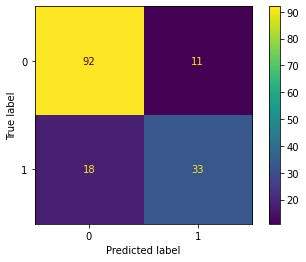

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(grid, X_test, y_test)
plt.show()